In [1]:
import os
import ironpdf as ip
import pandas as pd
import re


columns = ['Sno', 'EAN No', 'Article Description', 'UOM', 'Qty', 'Free', 'B.Price', 
           'Sp.Dis %', 'Sch.Val', 'SGST/UTGST %', 'CGST/IGST %', 'Cess', 'L.Price', 
           'MRP', 'T.Value', 'HSN Code', 'Ship To', 'Phone', 'Fax', 'Email', 
           'Buyer', 'Vendor FSSAI No', 'Validity', 'CIn', 'GSTIN', 'Po#', 
           'Po Date', 'Delivery Date', 'Vendor', 'Attn', 'GStIn']


final_df = pd.DataFrame(columns=columns)




def process_pdf(pdf_path):
    global final_df
    
    ip.License.LicenseKey = "IRONSUITE.KESHAVKALLANAHALLI.GANGADHARAIAH.TALENTPACE.COM.545-3D93DFABBA-AP764IDGFPBOH3W6-JRRQR3RSJ6QG-PQGLQMPP2ZOV-7M4NSFDKJ7F2-OZLUELBAHQSU-E4H2IZL7J3LW-RKW4T7-TXGF2LFQGNWMEA-DEPLOYMENT.TRIAL-ABS4FF.TRIAL.EXPIRES.12.APR.2024"
    pdf_file =ip.PdfDocument.FromFile(pdf_path)
    text = pdf_file.ExtractAllText()
    dataOfCustomer={
        "Ship To":'ddd',
        "Phone":'',"Fax":'',"Email":'',"Buyer":'',"Vendar Fsssai No":'',"Validity":'',"CIn":'',"GSTIN":'','Pincode':''}
    dataOfVender={
        "Po#":'',"Po Date"
    :'',"Delivery Date":'',"Vender":'',"Phone":'',"Fax":'',"Email":'',"Attn":'',"GStIn":''
    }
    information_array = text.strip().split('\n')

    text = ' '.join(information_array)
    data = re.split(r'Vendor\s*\r', text)
    temp=data[0].strip().split('\r')
    # text=data[1]


    for i in range(len(temp)): 
        if "Ship To" in temp[i]:
            dataOfCustomer['Ship To'] = temp[i]
            dataOfCustomer['Ship To'] +=  "\n"+ temp[i + 1]
            dataOfCustomer['Ship To'] +=  "\n" + temp[i + 5]
            dataOfCustomer['Ship To'] +=  "\n" + temp[i + 8]
            dataOfCustomer['Ship To'] +=  "\n" + temp[i + 2]
            dataOfCustomer['Ship To']=dataOfCustomer['Ship To'][len('Ship To'):]
        


        if "Phone" in temp[i]:
            dataOfCustomer['Phone']=temp[i]
            dataOfCustomer['Phone']=dataOfCustomer['Phone'][len('Phone')+1:]
        if "Fax" in temp[i]:
            dataOfCustomer['Fax']=temp[i]
            dataOfCustomer['Fax']=dataOfCustomer['Fax'][len('Fax')+1:]
        if 'Email' in temp[i]:
            dataOfCustomer['Email']=temp[i]
            dataOfCustomer['Email']=dataOfCustomer['Email'][len('Email')+1:]
        if 'Buyer' in temp[i]:
            dataOfCustomer['Buyer']=temp[i]
            dataOfCustomer['Buyer']=dataOfCustomer['Buyer'][len('Buyer')+1:]
        if 'Vendor FSSAI No' in temp[i]:
            dataOfCustomer['Vendar Fsssai No']=temp[i]
            dataOfCustomer['Vendar Fsssai No']=dataOfCustomer['Vendar Fsssai No'][len('Vendar Fsssai No'):]
        if 'Validity' in temp[i]:
            dataOfCustomer['Validity']=temp[i][len('Validity')+1:]
            # dataOfCustomer['Validity']=dataOfCustomer['Validity']
        if 'CIN' in temp[i]:
            dataOfCustomer['CIn']=temp[i+2]
            dataOfCustomer['CIn']=dataOfCustomer['CIn'][len('CIn')+1:]
        if 'GSTIN' in temp[i]:
            dataOfCustomer['GSTIN']=temp[i+2][2:]
            # dataOfCustomer['GSTIN']=dataOfCustomer['GSTIN'][len('GSTIN')+1:]


    dataOfCustomer['Pincode']=dataOfCustomer['Ship To'][len(dataOfCustomer['Ship To'])-7:]   
    for key, value in dataOfCustomer.items():
        dataOfCustomer[key] = value.replace('\n', '').replace('\r', '')
            
    df = pd.DataFrame(list(dataOfCustomer.items()), columns=['Key', 'Value'])

    data = re.split(r'Sno', text)
    temp=data[0].strip().split('\r')

    temp.insert(0,'Vendor')
    for i in range(len(temp)):
        if 'PO #' in temp[i]:
            dataOfVender['Po#']=temp[i+3]
            dataOfVender['Po Date']=temp[i+4]
            dataOfVender['Delivery Date']=temp[i+5]
        if 'Vendor' in temp[i]:
            dataOfVender['Vender']=temp[i+5]
            dataOfVender['Vender']+= "\n"+ temp[i + 6]
            dataOfVender['Vender']+= "\n"+ temp[i + 7]
        if 'Phone' in temp[i]:
            dataOfVender['Phone']=temp[i+7]
            dataOfVender['Phone']=dataOfVender['Phone'][:10]
            dataOfVender['Fax']=temp[i+7]
            dataOfVender['Fax']=dataOfVender['Fax'][18:]
            dataOfVender['Email']=temp[i+8]
            dataOfVender['GStIn']=temp[i+3]
            dataOfVender['GStIn']=dataOfVender['GStIn'][len('gstin')+1:]
    for key, value in dataOfVender.items():
        dataOfVender[key] = value.replace('\n', '').replace('\r', '')
    df1 = pd.DataFrame(list(dataOfVender.items()), columns=['Key', 'Value'])

    temp=data[1:]
    temp= ' '.join(temp)
    temp=temp.strip().split('\r')
    temp1=[]
    for i in range(len(temp)):
        if 'EAN' in temp[i]:
            for j in range(i,len(temp)):
                if 'HIMALAYA' in temp[j]:
                    
                    break  # Break out of the inner loop when 'HIMALAYA' is found
                temp[j] = ''
    for i in temp:
        if 'Total' in i:
            break
        if i == '' or 'Page' in i or  'Purchase order' in i:
            continue
        temp1.append(i)
    main_data={
        'Sno': 1,
        'EAN No': 1,
        'Article Description': 1,
        'UOM': 1,
        'Qty': 1,
        'Free': 1,
        'B.Price': 1,
        'Sp.Dis %': 1,
        'Sch.Val': 1,
        'SGST/UTGST %': 1,
        'CGST/IGST %': 1,
        'Cess': 1,
        'L.Price': 1,
        'MRP': 1,
        'T.Value': 1,
        'HSN Code':1
        
        }


    # data = pd.DataFrame([main_inner])
    data1=pd.DataFrame(columns=main_data.keys())   
    # merged_data= pd.concat([data1,data], axis=1)
    i=0 
    while i<len(temp1):
        
        for j in range(i,i+1,1):
            
            main_data['Sno']=temp1[j][:3]
            main_data['EAN No']=temp1[j][2:16]
            main_data['Article Description']=temp1[j][17:]
            for k in range(j+1,j+5,1):
                i+=1
                if 'Code' in temp1[k]:
                    pattern=r"\b\d{8}\b"
                    matches = re.findall(pattern, temp1[k])
                    main_data['HSN Code']=matches
                if 'EA ' in temp1[k]:
                    words_array = temp1[k].split()
                    # print(words_array)
                    
                    main_data['UOM']=words_array[0]
                    main_data['Qty']=words_array[1]
                    main_data['Free']=words_array[2] if len(words_array) > 1 else None
                    main_data['B.Price']=words_array[3]
                    main_data['Sp.Dis %']=words_array[4]
                    main_data['Sch.Val']=words_array[5]
                    main_data['SGST/UTGST %']=words_array[6]
                    main_data['CGST/IGST %']=words_array[7]
                    main_data['Cess']=words_array[8]
                    main_data['L.Price']=words_array[9]
                    main_data['MRP']=words_array[10]
                    main_data['T.Value']=words_array[11]
                    break
                main_data['Article Description']+="\n"+ temp1[k]
            i+=1
            break
        
        temp_df=pd.DataFrame(main_data)
        data1 = pd.concat([data1,temp_df],ignore_index=True)    
        

    
    t=data1
    for col_name, col_data in dataOfCustomer.items():
        t[col_name] = col_data
    for col_name, col_data in dataOfVender.items():
        t[col_name] = col_data
    final_df = pd.concat([final_df, t],ignore_index=True)
    return final_df







            


      
        
    






# Specify the path to the top-level folder containing laptop data
top_folder_path = r"C:\Users\admin\Desktop\finalpdf"
for file in os.listdir(top_folder_path):
    file_path = os.path.join(top_folder_path, file)
    final_df=process_pdf(file_path)

print(final_df)
# Process all PDF files in the folder and its subfolders
# process_folder(top_folder_path)

Attempting import of IronPdf 2024.2.1.2
Checking directory "c:\Users\admin\anaconda3"
Warning! Failed to install .NET 6.0. Consider manually installing .NET 6.0 from https://dotnet.microsoft.com/en-us/download/dotnet/6.0
Succesfully located files in "c:\Users\admin\anaconda3"
IronPdf detected root Python package directory of c:\Users\admin\anaconda3/IronPdf.Slim
IronPdf will now download dependencies for Windows to c:\Users\admin\anaconda3\IronPdf.Native.Chrome.Windows\2024.2.1.2. If you encounter any issues launching IronPdf, please remove .nupkg files from this directory and try again. Visit https://ironpdf.com/python/docs/ for more information.
Optionally you may set Installation.CustomDeploymentDirectory to a custom directory and manually download IronPdf.Native.Chrome.Windows NuGet package to this directory.
     Sno          EAN No                                Article Description  \
0     1    8901138815936  HIMALAYA ANTI HAIR FAL\n SHAMPO-200ML [HSN\n C...   
1     2    890113

In [2]:
final_df['Qty']=final_df['Qty'].astype(int)

In [6]:
# final_df['Qty'].sum()
# df_no_duplicates = final_df.drop_duplicates()
# df_no_duplicates
print(final_df['Po Date'].dtypes)

object


In [69]:
df1 = pd.DataFrame(columns=['Article', 'Qty'])

# Group by 'Article Description'
groupBy_article = final_df.groupby('Article Description')

# Iterate over groups
for article_description, df in groupBy_article:
    # Calculate the sum of 'Qty' for each group
    qty_sum = df['Qty'].sum()
    
    # Create a temporary DataFrame for the current group
    temp_df = pd.DataFrame({'Article': [article_description], 'Qty': [qty_sum]})
    
    # Append the temporary DataFrame to df1
    df1 = pd.concat([df1, temp_df], ignore_index=True)

temp_df=df1.sort_values('Qty').tail(10)
temp_df




,Article,Qty
102,HIMALAYA HERB SPARK\n WH THPASTE-150G [HSN\n C...,612
139,HIMALAYA PURI NEEM\n FACE WASH(100ML)\n [HSN C...,636
120,HIMALAYA NEEM TURM\n SOAP 4X125(500G)\n [HSN C...,678
146,HIMALAYA PURIFYING\n NEEM SCRUB 100G [HSN\n Co...,678
95,HIMALAYA HARB COMP\n CAR TOPS-2NX150G\n [HSN C...,840
140,HIMALAYA PURI NEEM\n FACEWASH(200ML) [HSN\n Co...,924
105,HIMALAYA HND TUL\n SOAP B3G1F(3X125G)\n [HSN C...,960
109,HIMALAYA LIP BALM-10\n G [HSN\n Code:33041000],1152
145,HIMALAYA PURIFY NEEM\n FACEWS (150ML) [HSN\n C...,1512
117,HIMALAYA NEEM FACE\n WASH 50ML [HSN\n Code:330...,1512


Ploting Grapth for top 10 selling

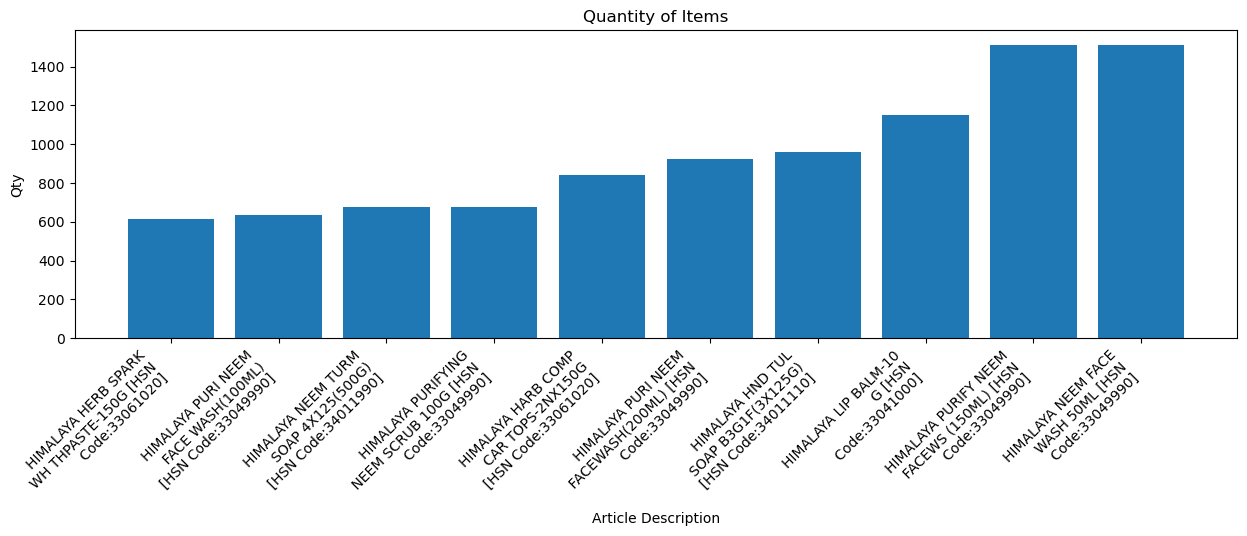

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
plt.bar(x=temp_df['Article'], height=temp_df['Qty'])
plt.xlabel('Article Description')
plt.ylabel('Qty')
plt.title('Quantity of Items')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability if needed
plt.show()


Ploting Graph for least 10 selling items


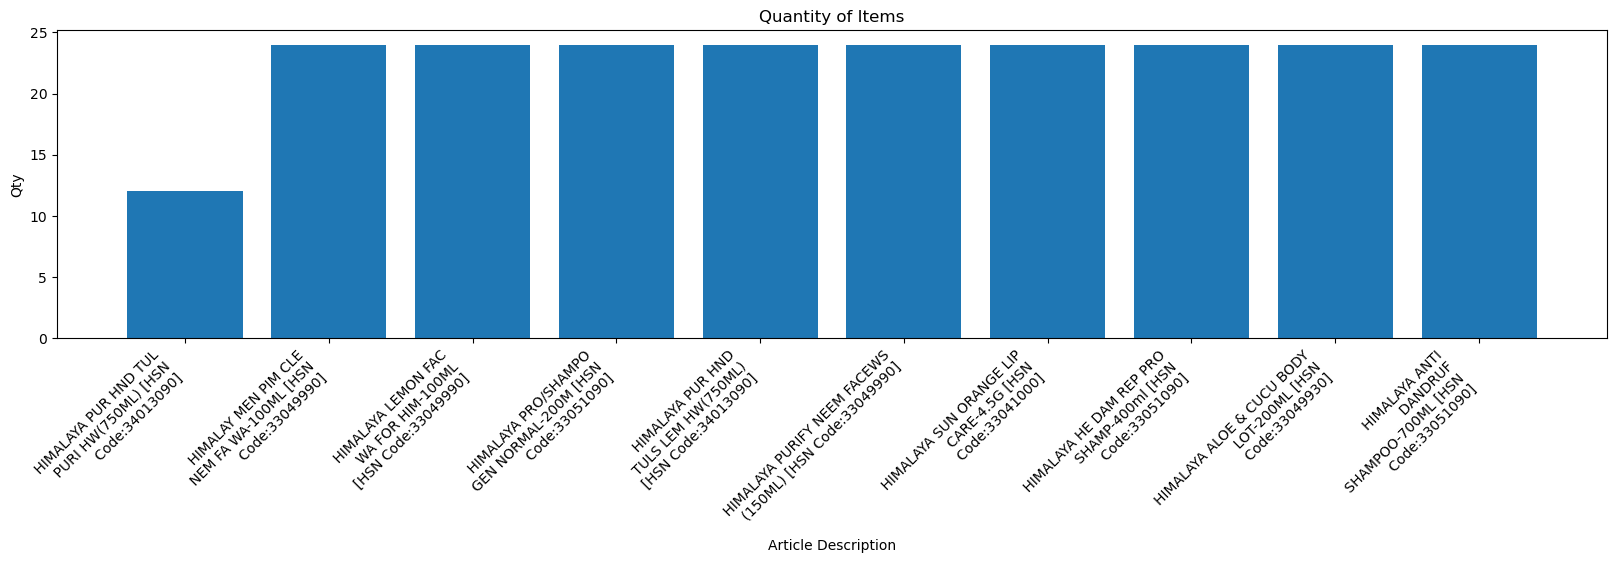

In [66]:
temp_df=df1.sort_values('Qty').head(10)
plt.figure(figsize=(20, 4))
plt.bar(x=temp_df['Article'], height=temp_df['Qty'])
plt.xlabel('Article Description')
plt.ylabel('Qty')
plt.title('Quantity of Items')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability if needed
plt.show()

In [6]:

from pymongo import MongoClient

# Load your DataFrame (assuming you already have one)
# df = pd.read_csv('your_data.csv')

# Convert DataFrame to dictionary (each row becomes a dictionary)
data = final_df.to_dict(orient='records')

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')  # Connect to your MongoDB server
db = client['Himalayn_DataBase']  # Choose your database
collection = db['ProductList']  # Choose your collection

# Insert data into MongoDB
collection.insert_many(data)

print("Data inserted successfully into MongoDB.")


Data inserted successfully into MongoDB.


In [ ]:

groupBy_pincode=final_df.groupby('Pincode')
for pincode,df in groupBy_pincode:
    
    temp_df=df.sort_values('Qty').head(10)
    print(temp_df)
    plt.figure(figsize=(15, 4))
    plt.bar(x=df['Article Description'], height=df['Qty'])
    plt.xlabel('Article Description')
    plt.ylabel('Qty')
    plt.title('Quantity of Items')
    plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability if needed
    plt.show()
    print('====================')
    

    # tempdf=df.sort_values(by='Qty', ascending=False).head(10)
    # tempdf['Qty']=tempdf['Qty'].astype(int)

    # # Plotting the bar chart
    # plt.figure(figsize=(15, 4))
    # plt.bar(tempdf['Article Description'], tempdf['Qty'], color='skyblue')
    # plt.xlabel('Article Description')
    # plt.xticks(rotation=45, ha='right')
    # plt.ylabel('Sell Quantity')
    # plt.title('Sell Quantity of Items')
    # plt.show()


: 

In [48]:


# Example DataFrame similar to your 'final_df'


# Create an empty DataFrame with the specified columns


                                               Article   Qty
0     HIMALAY MEN PIM CLE\n NEM FA WA-100ML [HSN\n ...    24
1     HIMALAY MSTRSG ALO\n VER FAC WSH 50ML\n [HSN ...    96
2     HIMALAY MSTRZG ALO\n VR FAC WAS-100ML\n [HSN ...    30
3     HIMALAY MSTRZG ALO VR FAC\n WAS-100ML [HSN\n ...   120
4     HIMALAY NRSNG BDY\n LOT NRM SKN-200ML\n [HSN ...    24
..                                                 ...   ...
142  HIMALAYA PURI.NEEM\n PACK 100G [HSN\n Code:330...   120
143  HIMALAYA PURIFY NEEM\n FACEWS (150ML) [HSN\n C...  1512
144  HIMALAYA PURIFYING\n NEEM SCRUB 100G [HSN\n Co...   678
145  HIMALAYA PURIFYING\n NEEM SCRUB(12G) [HSN\n Co...   120
146  HIMALAYA SOOTHING BODY\n LOTION-200ML [HSN\n C...    96

[147 rows x 2 columns]
